Installing sentence Transformer for encoding sentences and paragraphs into dense vector representation, commonly referred to as embeddings.

In [1]:
pip install sentence-transformers


Note: you may need to restart the kernel to use updated packages.


Importing the desired Libraries

In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Importing the CSV file and storing it in the DataFrame df.

In [3]:
csv_file = "Precily_Text_Similarity.csv"
df = pd.read_csv(csv_file)

Storing the 1st and 2nd Column paragraphs from CSV file in python list and storing it in text1 and text2 

In [4]:
text1 = df["text1"].tolist()
text2 = df["text2"].tolist()

Load the Sentence Transformer model

In [5]:
model = SentenceTransformer('all-MiniLM-L6-v2')

Compute embeddings for both lists

In [6]:
embeddings1 = model.encode(text1, convert_to_tensor=True)
embeddings2 = model.encode(text2, convert_to_tensor=True)

Compute cosine similarities. 
Cosine Similarity ranges from -1 to 1. 
To compare the similarity between two sentence embeddings (vectors), cosine similarity is calculated as the cosine of the angle between the two vectors. It's value completly depends on  the thetha value. as cos(180) = -1 and cos(0) = 1 whereas 
cos(90) = cos(270) = 0
It is computed as the dot product of the two vectors divided by the product of their magnitudes.

In [7]:
cosine_scores = util.cos_sim(embeddings1, embeddings2)

In [8]:
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(cosine_scores)


In [9]:
normalized_scores = np.clip(normalized_scores, 0, 1)

Create a new column in the DataFrame for Similarity Scores and Save the DataFrame with the new column back to the CSV file

In [10]:
df["SimilarityScore"] = [cosine_scores[i][i] for i in range(len(text1))]

In [11]:
df.to_csv(csv_file, index=False)

In [12]:
print(df.columns)

Index(['text1', 'text2', 'SimilarityScore', 'EmbeddingDistance'], dtype='object')


Checking Top 30 rows of the table

In [13]:
df.head(10)

,text1,text2,SimilarityScore,EmbeddingDistance
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,tensor(0.0862),tensor(0.9138)
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,tensor(0.1655),tensor(0.8345)
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,tensor(0.0778),tensor(0.9222)
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,tensor(-0.1862),tensor(1.1862)
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,tensor(0.0887),tensor(0.9113)
5,india to deport bollywood actress india has or...,fosters buys stake in winemaker australian bre...,tensor(-0.0333),tensor(1.0333)
6,mutant book wins guardian prize a book about t...,jp morgan admits us slavery links thousands of...,tensor(-0.0154),tensor(1.0154)
7,aids and climate top davos agenda climate chan...,howl helps boost japan s cinemas japan s box o...,tensor(0.0103),tensor(0.9897)
8,kennedy predicts bigger turnout voters pent ...,ocean s twelve raids box office ocean s twelve...,tensor(0.0117),tensor(0.9883)
9,carry on star patsy rowlands dies actress pats...,uk broadband gets speed injection broadband s ...,tensor(-0.0126),tensor(1.0126)


Count the numbers where similarity score = 1

In [14]:
total_similarity_score_1 = (df["SimilarityScore"] == 1).sum()

print("Total rows with similarity score 1:", total_similarity_score_1)

Total rows with similarity score 1: 1


Calulate the Embedding Distance.

In [15]:
embedding_distance = 1 - cosine_scores

Create a new column in the DataFrame for Embedding Distances and saving it into csv file

In [16]:
df["EmbeddingDistance"] = [embedding_distance[i][i] for i in range(len(text1))]

In [17]:
df.to_csv(csv_file, index=False)

In [18]:
df.describe()

,text1,text2,SimilarityScore,EmbeddingDistance
count,3000,3000,3000,3000
unique,1277,1256,3000,3000
top,stars pay tribute to actor davis hollywood sta...,edwards tips idowu for euro gold world outdoor...,tensor(0.0862),tensor(0.9138)
freq,9,12,1,1


In [19]:
df.head(20)

,text1,text2,SimilarityScore,EmbeddingDistance
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,tensor(0.0862),tensor(0.9138)
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,tensor(0.1655),tensor(0.8345)
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,tensor(0.0778),tensor(0.9222)
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,tensor(-0.1862),tensor(1.1862)
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,tensor(0.0887),tensor(0.9113)
5,india to deport bollywood actress india has or...,fosters buys stake in winemaker australian bre...,tensor(-0.0333),tensor(1.0333)
6,mutant book wins guardian prize a book about t...,jp morgan admits us slavery links thousands of...,tensor(-0.0154),tensor(1.0154)
7,aids and climate top davos agenda climate chan...,howl helps boost japan s cinemas japan s box o...,tensor(0.0103),tensor(0.9897)
8,kennedy predicts bigger turnout voters pent ...,ocean s twelve raids box office ocean s twelve...,tensor(0.0117),tensor(0.9883)
9,carry on star patsy rowlands dies actress pats...,uk broadband gets speed injection broadband s ...,tensor(-0.0126),tensor(1.0126)


In [20]:
df["EmbeddingDistance"] = np.clip(df["EmbeddingDistance"], 0, 1)
min_embedding_distance = df["EmbeddingDistance"].min()
max_embedding_distance = df["EmbeddingDistance"].max()

Printing Max and Min embedding distance

In [21]:
print("Minimum Embedding Distance:", min_embedding_distance)
print("Maximum Embedding Distance:", max_embedding_distance)

Minimum Embedding Distance: 0
Maximum Embedding Distance: 1


Finding any duplicate paragraph in the dataset

In [22]:
duplicate_count = df.duplicated().sum()

In [23]:
print("Number of duplicate rows in the dataset:", duplicate_count)

Number of duplicate rows in the dataset: 0


In [24]:
df.describe()

,text1,text2,SimilarityScore,EmbeddingDistance
count,3000,3000,3000,3000
unique,1277,1256,3000,2580
top,stars pay tribute to actor davis hollywood sta...,edwards tips idowu for euro gold world outdoor...,tensor(0.0862),1
freq,9,12,1,421


Last 10 lows of the dataset

In [25]:
df.tail(10)

,text1,text2,SimilarityScore,EmbeddingDistance
2990,millions to miss out on the net by 2025 40% o...,rocker doherty in on-stage fight rock singer p...,tensor(0.0366),tensor(0.9634)
2991,candela completes bolton switch bolton boss sa...,hague s six-figure earnings shown the rewards ...,tensor(0.2797),tensor(0.7203)
2992,moya fights back for indian title carlos moya ...,cairn shares slump on oil setback shares in ca...,tensor(0.1958),tensor(0.8042)
2993,voters don t trust politicians eight out of ...,aviator wins top globes accolades the aviator ...,tensor(0.0878),tensor(0.9122)
2994,uk youth interested in politics the majority...,fear will help france - laporte france coach b...,tensor(0.1710),tensor(0.8290)
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,tensor(0.0803),tensor(0.9197)
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,tensor(0.0979),tensor(0.9021)
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,tensor(-0.1150),1
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...,tensor(-0.0045),1
2999,criminal probe on citigroup deals traders at u...,former ni minister scott dies former northern ...,tensor(-0.0183),1


Visualization 

In [26]:
threshold = 0.4

# Create two new columns to classify pairs as similar or dissimilar
df['SimilarPairs'] = df['SimilarityScore'] >= threshold
df['DissimilarPairs'] = df['SimilarityScore'] < threshold

In [27]:
similar_count = df['SimilarPairs'].sum()
dissimilar_count = df['DissimilarPairs'].sum()

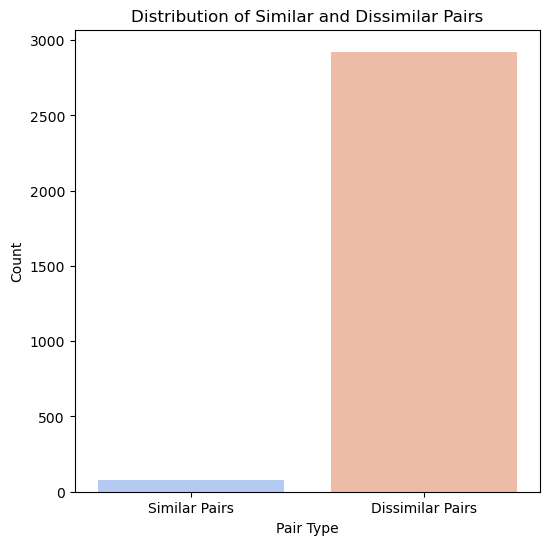

In [28]:
plt.figure(figsize=(6, 6))
sns.barplot(x=['Similar Pairs', 'Dissimilar Pairs'], y=[similar_count, dissimilar_count], palette='coolwarm')
plt.title('Distribution of Similar and Dissimilar Pairs')
plt.xlabel('Pair Type')
plt.ylabel('Count')
plt.show()

In [29]:
similar_count = df['SimilarPairs'].sum()
dissimilar_count = df['DissimilarPairs'].sum()

In [30]:
print("Similar Count:", similar_count)

Similar Count: 77


In [31]:
print("dissimilar count:", dissimilar_count)

dissimilar count: 2923


Other manual examples for finding the similarity scores

In [32]:
text3 = "He is a boy"
text4 = "A dog is playing in the garden"

In [33]:
embedding1 = model.encode(text3, convert_to_tensor=True)
embedding2 = model.encode(text4, convert_to_tensor=True)

In [34]:
cosine_score = util.pytorch_cos_sim(embedding1, embedding2)

In [35]:
print("Similarity Score:", cosine_score.item())

Similarity Score: -0.07096695899963379


In [36]:
text5 = "Hello Python my name is Aakarshan"
text6 = "Hello Python my name is Jha"

text7 = "Good Morning! How are you?"
text8= "Good Morning How are you"

text9 = "I love Machine Learning"
text10 = "I love Machine Learning"

In [37]:
embedding5 = model.encode(text5, convert_to_tensor=True)
embedding6 = model.encode(text6, convert_to_tensor=True)

embedding7 = model.encode(text7, convert_to_tensor=True)
embedding8 = model.encode(text8, convert_to_tensor=True)

embedding9 = model.encode(text9, convert_to_tensor=True)
embedding10 = model.encode(text10, convert_to_tensor=True)

In [38]:
cosine_score1 = util.pytorch_cos_sim(embedding5, embedding6)

cosine_score2 = util.pytorch_cos_sim(embedding7, embedding8)

cosine_score3 = util.pytorch_cos_sim(embedding9, embedding10)

In [42]:
print("Similarity Score for Pair 1:", cosine_score1)
print("Similarity Score for Pair 2:", cosine_score2)
print("Similarity Score for Pair 3:", cosine_score3)

Similarity Score for Pair 1: tensor([[0.8399]])
Similarity Score for Pair 2: tensor([[0.9185]])
Similarity Score for Pair 3: tensor([[1.0000]])
